In [1]:
import sys
sys.path.append('../')

In [2]:
### Libraries
from pipelines.experimental_modeling_pipeline import DiabetesPreprocessing as DP
from pipelines.experimental_modeling_pipeline import AsthmaPreprocessing as AP
from pipelines.experimental_modeling_pipeline import ClusteringAnalysis as QA
from pipelines.experimental_modeling_pipeline import Experimental_modeling_pipeline as EMP
from pipelines.experimental_modeling_pipeline import CopdPreprocessing as COPDP
from pipelines.experimental_modeling_pipeline import ObesityPreprocessing as OP
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats

dp = DP("C:/Users/keimp/")
ap = AP("C:/Users/keimp/")
copdp = COPDP("C:/Users/keimp/")
op = OP("C:/Users/keimp/")
emp = EMP()

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans
from imblearn.over_sampling import SVMSMOTE
from sklearn.linear_model import LinearRegression
import scipy.stats as st 
import statsmodels.stats.api as sms

In [3]:
df = pd.read_csv("C:/Users/keimp/NHS/Data_files/Labeling/osteoporosis_diagnosis_dates.csv")

In [4]:
df["Date M80 first reported (osteoporosis with pathological fracture)_binary"] = df["Date M80 first reported (osteoporosis with pathological fracture)"].apply(dp.nan_to_binary)
df["Date M81 first reported (osteoporosis without pathological fracture)_binary"] = df["Date M81 first reported (osteoporosis without pathological fracture)"].apply(dp.nan_to_binary)
df["Date M82 first reported (osteoporosis in diseases classified elsewhere)_binary"] = df["Date M82 first reported (osteoporosis in diseases classified elsewhere)"].apply(dp.nan_to_binary)

In [5]:
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Blood_biomarkers.csv"), on="Participant ID")
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Urine_biomarkers.csv"), on="Participant ID")
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Demographics.csv"), on="Participant ID")
df = df.merge(pd.read_csv(op.medical_conditions), on="Participant ID")
df = df.merge(pd.read_csv(op.bodymeasures), on="Participant ID")
df = df.merge(pd.read_csv(op.physical_activity), on="Participant ID")
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Depression.csv"), on="Participant ID")
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Diagnosis_age_assessment_center_participant.csv"), on="Participant ID")

C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (3,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (12,24,37,42,75) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (2,3,4,6,7,8,10,11,12,20,22,24) have mixed types.Specify dtype 

In [6]:
df = df.merge(dp.pre_demographics_ethnicity(), on="Participant ID")
df = df.merge(dp.pre_alcohol(), on="Participant ID")

In [7]:
df = df.merge(copdp.pre_assesment(), on="Participant ID")

In [8]:
smoking_data = pd.read_csv("C:/Users/keimp/NHS/Data_files/supplementary_data/smokers_data_keimpe_participant.csv")
smoking_data = smoking_data.rename(columns={"eid": 'Participant ID', "p20161_i0":"Pack years of smoking",
                                          "p20162_i0":"Pack years adult smoking as proportion of life span exposed to smoking",
                                          "p3436_i0":"Age started smoking in current smokers",
                                          "p2867_i0":"Age started smoking in former smokers",
                                          "p3456_i0":"Number of cigarettes currently smoked daily (current cigarette smokers)",
                                          "p6183_i0":"Number of cigarettes previously smoked daily (current cigar/pipe smokers)",
                                          "p2887_i0":"Number of cigarettes previously smoked daily"})
df = df.merge(smoking_data, on="Participant ID")

In [9]:
df['Age at menopause (last menstrual period) | Instance 0'] = df['Age at menopause (last menstrual period) | Instance 0'].replace("Do not know", pd.np.nan)
df['Age at menopause (last menstrual period) | Instance 0'] = df['Age at menopause (last menstrual period) | Instance 0'].replace("Prefer not to answer", pd.np.nan)
df['Age at menopause (last menstrual period) | Instance 0'] = pd.to_numeric(df['Age at menopause (last menstrual period) | Instance 0'])

C:\Users\keimp\AppData\Local\Temp\ipykernel_39680\1925706954.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Age at menopause (last menstrual period) | Instance 0'] = df['Age at menopause (last menstrual period) | Instance 0'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_39680\1925706954.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Age at menopause (last menstrual period) | Instance 0'] = df['Age at menopause (last menstrual period) | Instance 0'].replace("Prefer not to answer", pd.np.nan)


In [11]:
def menopause_binary(l):
    if str(l[1]) == 'nan':
        return pd.np.nan
    if l[0] < l[1]:
        return 1
    return 0

df["menopause_binary"] = df[['Age at recruitment','Age at menopause (last menstrual period) | Instance 0']].apply(menopause_binary, axis=1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_39680\2357346561.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [12]:
df[ 'Date M80 first reported (osteoporosis with pathological fracture)_year'] = pd.DatetimeIndex(df['Date M80 first reported (osteoporosis with pathological fracture)']).year
df[ 'Date M81 first reported (osteoporosis without pathological fracture)_year'] = pd.DatetimeIndex(df['Date M81 first reported (osteoporosis without pathological fracture)']).year
df[ 'Date M82 first reported (osteoporosis in diseases classified elsewhere)_year'] = pd.DatetimeIndex(df['Date M82 first reported (osteoporosis in diseases classified elsewhere)']).year

In [13]:
def age_osteo(l):
    return l[1]-l[0]
    
df["Date M80 first reported (osteoporosis with pathological fracture)_age"] = df[['Year of birth', 'Date M80 first reported (osteoporosis with pathological fracture)_year']].apply(age_osteo, axis=1)
df["Date M81 first reported (osteoporosis without pathological fracture)_age"] = df[['Year of birth', 'Date M80 first reported (osteoporosis with pathological fracture)_year']].apply(age_osteo, axis=1)
df["Date M82 first reported (osteoporosis in diseases classified elsewhere)_age"] = df[['Year of birth', 'Date M80 first reported (osteoporosis with pathological fracture)_year']].apply(age_osteo, axis=1)

In [14]:
df['Sex'] = df['Sex'].apply(dp.sex_to_binary)

In [16]:
df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Prefer not to answer", pd.np.nan)
df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Do not know", pd.np.nan)

df['Duration of other exercises | Instance 0'] = df['Duration of other exercises | Instance 0'].replace("Prefer not to answer", pd.np.nan)
df['Duration of other exercises | Instance 0'] = df['Duration of other exercises | Instance 0'].replace("Do not know", pd.np.nan)

df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'] = df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'].replace("Prefer not to answer", pd.np.nan)
df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'] = df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'].replace("Do not know", pd.np.nan)
df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'] =df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'].apply(ap.yes_no_binairy)

df['Diabetes diagnosed by doctor | Instance 0'] = df['Diabetes diagnosed by doctor | Instance 0'].replace("Prefer not to answer", pd.np.nan)
df['Diabetes diagnosed by doctor | Instance 0'] = df['Diabetes diagnosed by doctor | Instance 0'].replace("Do not know", pd.np.nan)
df['Diabetes diagnosed by doctor | Instance 0'] =df['Diabetes diagnosed by doctor | Instance 0'].apply(ap.yes_no_binairy)

one_hot = pd.get_dummies(df['IPAQ activity group | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

one_hot = pd.get_dummies(df['Duration of strenuous sports | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

one_hot = pd.get_dummies(df['Usual walking pace | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_39680\2001986341.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_39680\2001986341.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_39680\2001986341.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Duration of other exercises | Instance 0'] = df['Duration of other exercises | Instance 0'].replace("Prefer not t

In [17]:
df['Date of attending assessment centre | Instance 0'] = pd.to_datetime(df['Date of attending assessment centre | Instance 0'])
df['Date M81 first reported (osteoporosis without pathological fracture)'] = pd.to_datetime(df['Date M81 first reported (osteoporosis without pathological fracture)'])

df['diff_days'] = (df['Date M81 first reported (osteoporosis without pathological fracture)'] - df['Date of attending assessment centre | Instance 0']) / np.timedelta64(1, 'D')


In [18]:
import re

In [19]:
l = []

def get_comord(i):
    if str(i) != "nan":
        i = i.split("|")
        for j in i:
            if j not in l:
                l.append(j)
df['Non-cancer illness code, self-reported | Instance 0'].apply(get_comord)

0         None
1         None
2         None
3         None
4         None
          ... 
502350    None
502351    None
502352    None
502353    None
502354    None
Name: Non-cancer illness code, self-reported | Instance 0, Length: 502355, dtype: object

In [20]:
for i in l:
    def temp(l):
        if re.search(i, str(l)):
            return 1
        return 0
    df[i] = df['Non-cancer illness code, self-reported | Instance 0'].apply(temp)

In [24]:
def two_binary(l):
    if l[0] ==1:
        return 1
    if l[1] ==1:
        return 1
    return 0

df["all_osteo"] = df[['Date M80 first reported (osteoporosis with pathological fracture)_binary','Date M81 first reported (osteoporosis without pathological fracture)_binary']].apply(two_binary, axis=1)

In [25]:
print(df['Date M80 first reported (osteoporosis with pathological fracture)_binary'].value_counts())
print(df['Date M81 first reported (osteoporosis without pathological fracture)_binary'].value_counts())
print(df['all_osteo'].value_counts())

0    499613
1      2742
Name: Date M80 first reported (osteoporosis with pathological fracture)_binary, dtype: int64
0    475506
1     26849
Name: Date M81 first reported (osteoporosis without pathological fracture)_binary, dtype: int64
0    474278
1     28077
Name: all_osteo, dtype: int64


### Percentage based

#### continuous variables

##### Age

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


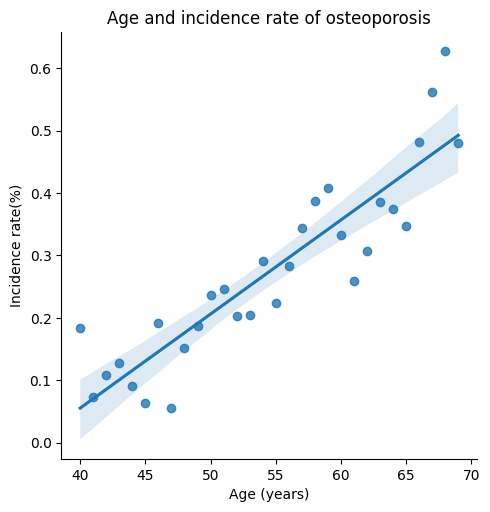

In [184]:
x = [i for i in range(40,70)]

y = []
for i in x:
    t = df[(df['Age at recruitment']==i) & (df['all_osteo']==0)]
    to = df[(df['Date M80 first reported (osteoporosis with pathological fracture)_age']==i) |
    (df['Date M81 first reported (osteoporosis without pathological fracture)_age']==i)]
    y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)

tempdf = pd.DataFrame()
tempdf["x"] = x
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel("Age (years)")
plt.ylabel("Incidence rate(%)")
plt.title("Age and incidence rate of osteoporosis")
plt.show()

#### BMI

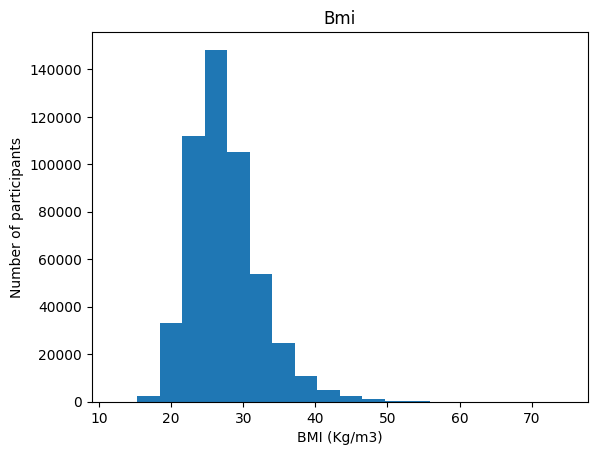

In [183]:
plt.hist(df['Body mass index (BMI) | Instance 0'].dropna().tolist(), bins=20)
plt.xlabel("BMI (Kg/m3)")
plt.ylabel("Number of participants")
plt.title("Bmi")
plt.show() 

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


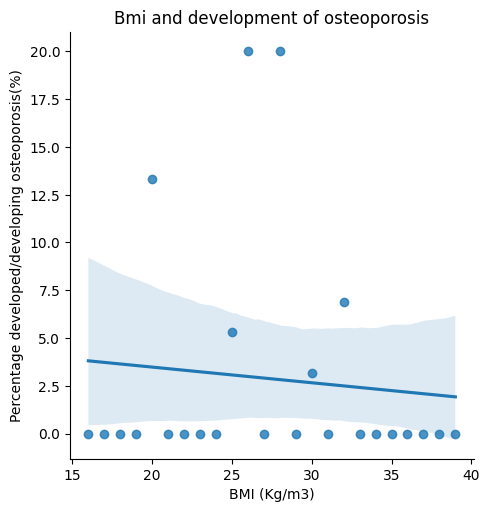

In [185]:
x = [i for i in range(16,40)]

y = []
for i in x:
    t = df[(df['Body mass index (BMI) | Instance 0']==i) & (df['all_osteo']==0)]
    to = df[(df['Body mass index (BMI) | Instance 0']==i) & (df['all_osteo']==1)]
    if to.shape[0] == 0:
        y.append(0)
    else:
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)

tempdf = pd.DataFrame()
tempdf["x"] = x
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel("BMI (Kg/m3)")
plt.ylabel("Percentage developed/developing osteoporosis(%)")
plt.title("Bmi and development of osteoporosis")
plt.show()

#### Height

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


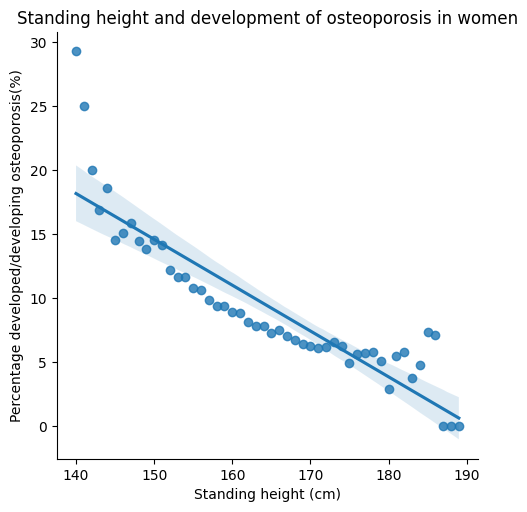

In [71]:
x = [i for i in range(140,190)]

y = []
for i in x:
    t = df[(df['Standing height | Instance 0']==i) & (df['all_osteo']==0) & (df["Sex"] ==0)]
    to = df[(df['Standing height | Instance 0']==i) & (df['all_osteo']==1)& (df["Sex"] ==0)]
    if to.shape[0] == 0:
        y.append(0)
    else:
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)

tempdf = pd.DataFrame()
tempdf["x"] = x
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel("Standing height (cm)")
plt.ylabel("Percentage developed/developing osteoporosis(%)")
plt.title("Standing height and development of osteoporosis in women")
plt.show()

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


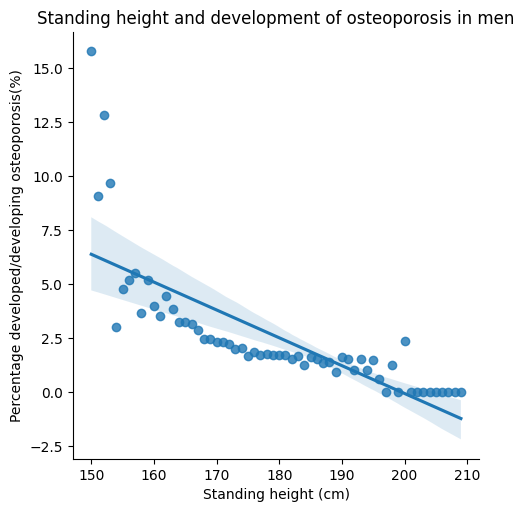

In [75]:
x = [i for i in range(150,210)]

y = []
for i in x:
    t = df[(df['Standing height | Instance 0']==i) & (df['all_osteo']==0) & (df["Sex"] ==1)]
    to = df[(df['Standing height | Instance 0']==i) & (df['all_osteo']==1)& (df["Sex"] ==1)]
    if to.shape[0] == 0:
        y.append(0)
    else:
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)

tempdf = pd.DataFrame()
tempdf["x"] = x
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel("Standing height (cm)")
plt.ylabel("Percentage developed/developing osteoporosis(%)")
plt.title("Standing height and development of osteoporosis in men")
plt.show()

#### Smoking

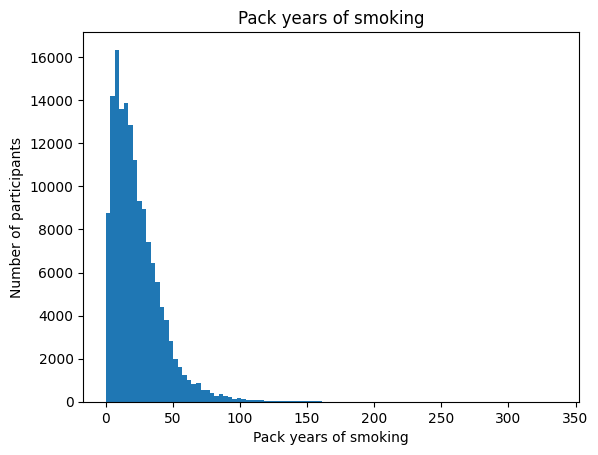

In [77]:
plt.hist(df['Pack years of smoking'].dropna().tolist(), bins=100)
plt.xlabel('Pack years of smoking')
plt.ylabel("Number of participants")
plt.title('Pack years of smoking')
plt.show() 

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


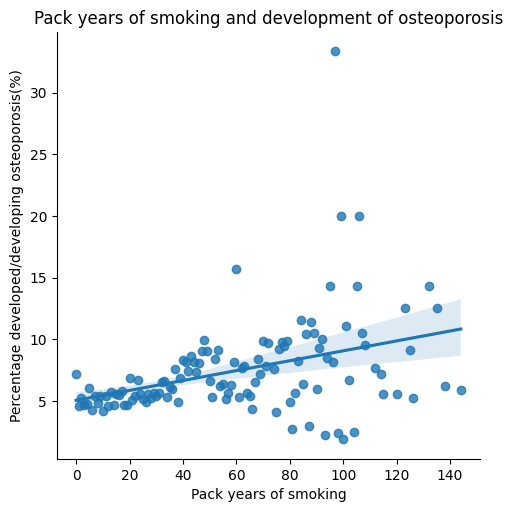

In [116]:
x = [i for i in range(0,150)]
xx=[]
y = []

for i in x:
    t = df[(df['Pack years of smoking']==i) & (df['all_osteo']==0) ]
    to = df[(df['Pack years of smoking']==i) & (df['all_osteo']==1)]
    
    if to.shape[0] == 0:
        y.remove(k/(k+h)*100)
        y.append(k/(k+h+t.shape[0])*100)
        h=h+t.shape[0]
        
    else:
        xx.append(i)
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)
        k = to.shape[0]
        h = t.shape[0]

tempdf = pd.DataFrame()
tempdf["x"] = xx
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel('Pack years of smoking')
plt.ylabel("Percentage developed/developing osteoporosis(%)")
plt.title("Pack years of smoking and development of osteoporosis")
plt.show()

#### Rheumatoid factor

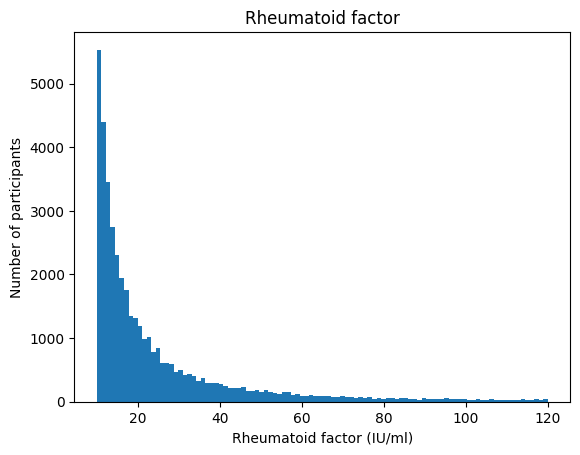

In [84]:
plt.hist(df['Rheumatoid factor | Instance 0'].dropna().tolist(), bins=100)
plt.xlabel( 'Rheumatoid factor (IU/ml)')
plt.ylabel("Number of participants")
plt.title('Rheumatoid factor')
plt.show() 

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


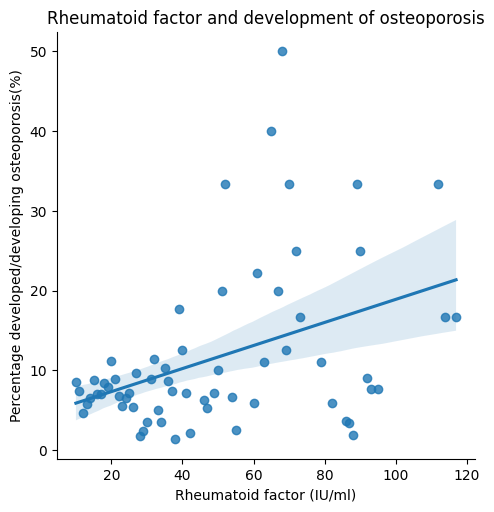

In [128]:
x = [i for i in range(0,120)]
xx=[]
y = []

for i in x:
    t = df[(df['Rheumatoid factor | Instance 0']==i) & (df['all_osteo']==0) ]
    to = df[(df['Rheumatoid factor | Instance 0']==i) & (df['all_osteo']==1)]
    if to.shape[0] == 0:
        
        if len(y) != 0:
            y.remove(k/(k+h)*100)
            y.append(k/(k+h+t.shape[0])*100)
            h=h+t.shape[0]  
    else:
        xx.append(i)
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)
        k = to.shape[0]
        h = t.shape[0]
        
tempdf = pd.DataFrame()
tempdf["x"] = xx
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel('Rheumatoid factor (IU/ml)')
plt.ylabel("Percentage developed/developing osteoporosis(%)")
plt.title("Rheumatoid factor and development of osteoporosis")
plt.show()

#### Current smoking

In [92]:
df['Number of cigarettes currently smoked daily (current cigarette smokers)'] = df['Number of cigarettes currently smoked daily (current cigarette smokers)'].replace("Do not know", pd.np.nan)
df['Number of cigarettes currently smoked daily (current cigarette smokers)'] = df['Number of cigarettes currently smoked daily (current cigarette smokers)'].replace("Less than one a day", pd.np.nan)
df['Number of cigarettes currently smoked daily (current cigarette smokers)'] = df['Number of cigarettes currently smoked daily (current cigarette smokers)'].replace("Prefer not to answer", pd.np.nan)
df['Number of cigarettes currently smoked daily (current cigarette smokers)'] = pd.to_numeric(df['Number of cigarettes currently smoked daily (current cigarette smokers)'])

C:\Users\keimp\AppData\Local\Temp\ipykernel_39680\2169364826.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Number of cigarettes currently smoked daily (current cigarette smokers)'] = df['Number of cigarettes currently smoked daily (current cigarette smokers)'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_39680\2169364826.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Number of cigarettes currently smoked daily (current cigarette smokers)'] = df['Number of cigarettes currently smoked daily (current cigarette smokers)'].replace("Less than one a day", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_39680\2169364826.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df

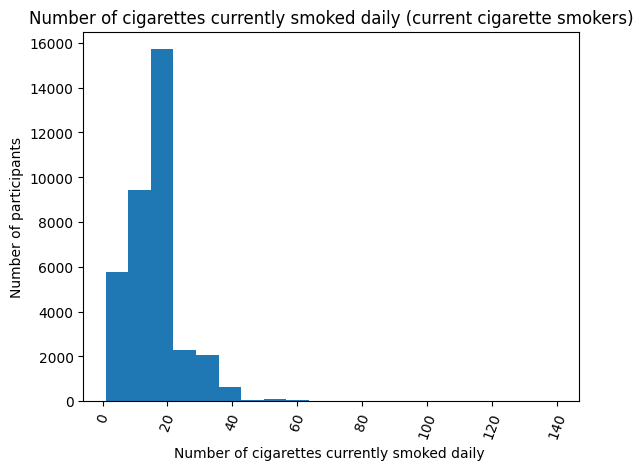

In [97]:
plt.hist(df['Number of cigarettes currently smoked daily (current cigarette smokers)'].dropna().tolist(), bins=20)
plt.xlabel( 'Number of cigarettes currently smoked daily ')
plt.ylabel("Number of participants")
plt.title('Number of cigarettes currently smoked daily (current cigarette smokers)')
plt.xticks(rotation=70)
plt.show() 

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


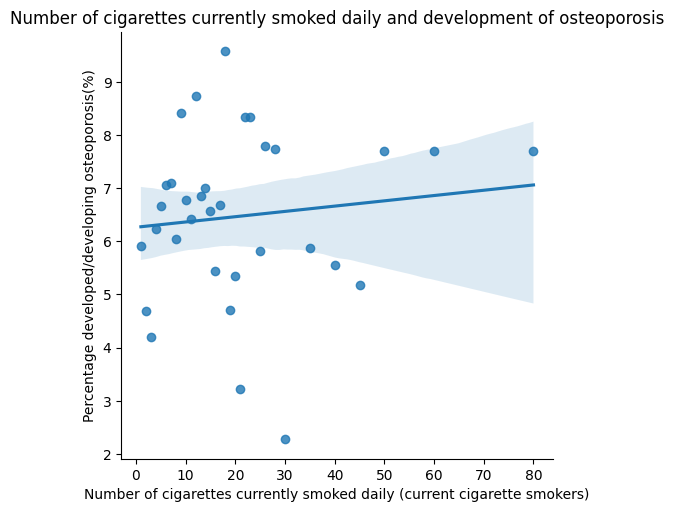

In [129]:
x = [i for i in range(0,120)]
xx=[]
y = []

for i in x:
    t = df[(df['Number of cigarettes currently smoked daily (current cigarette smokers)']==i) & (df['all_osteo']==0) ]
    to = df[(df['Number of cigarettes currently smoked daily (current cigarette smokers)']==i) & (df['all_osteo']==1)]
    if to.shape[0] == 0:
        
        if len(y) != 0:
            y.remove(k/(k+h)*100)
            y.append(k/(k+h+t.shape[0])*100)
            h=h+t.shape[0]  
    else:
        xx.append(i)
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)
        k = to.shape[0]
        h = t.shape[0]
        
tempdf = pd.DataFrame()
tempdf["x"] = xx
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel('Number of cigarettes currently smoked daily (current cigarette smokers)')
plt.ylabel("Percentage developed/developing osteoporosis(%)")
plt.title("Number of cigarettes currently smoked daily and development of osteoporosis")
plt.show()

#### Summed met activity

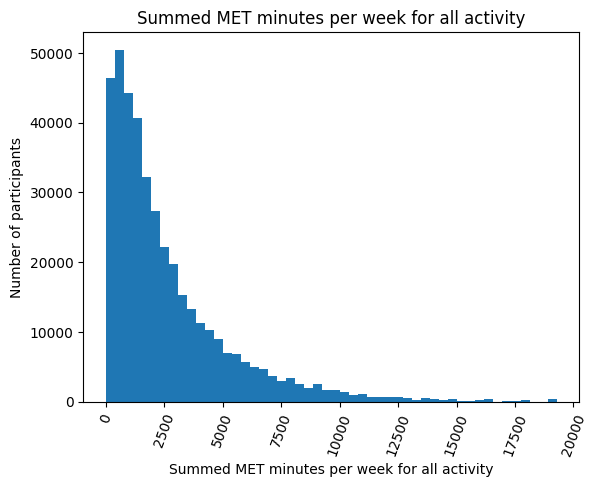

In [131]:
plt.hist(df['Summed MET minutes per week for all activity | Instance 0'].dropna().tolist(), bins=50)
plt.xlabel( 'Summed MET minutes per week for all activity')
plt.ylabel("Number of participants")
plt.title('Summed MET minutes per week for all activity')
plt.xticks(rotation=70)
plt.show() 

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


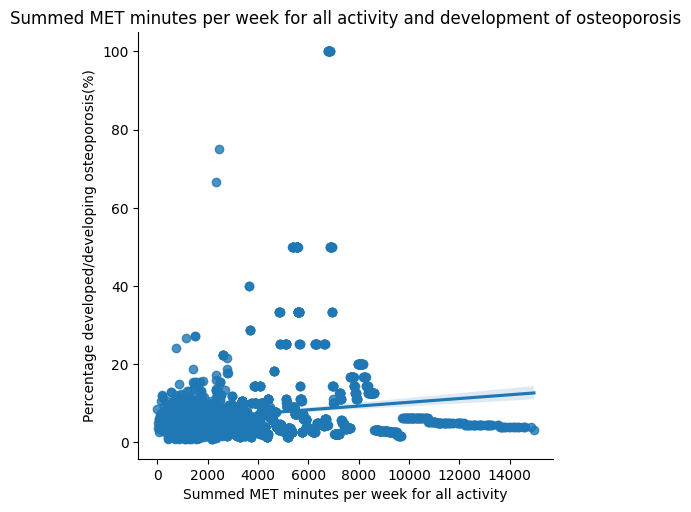

In [135]:
x = [i for i in range(0,15000)]
xx=[]
y = []

for i in x:
    t = df[(df['Summed MET minutes per week for all activity | Instance 0']==i) & (df['all_osteo']==0) ]
    to = df[(df['Summed MET minutes per week for all activity | Instance 0']==i) & (df['all_osteo']==1)]
    if to.shape[0] == 0:
        
        if len(y) != 0:
            y.remove(k/(k+h)*100)
            y.append(k/(k+h+t.shape[0])*100)
            h=h+t.shape[0]  
    else:
        xx.append(i)
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)
        k = to.shape[0]
        h = t.shape[0]
        
tempdf = pd.DataFrame()
tempdf["x"] = xx
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel('Summed MET minutes per week for all activity')
plt.ylabel("Percentage developed/developing osteoporosis(%)")
plt.title("Summed MET minutes per week for all activity and development of osteoporosis")
plt.show()

#### calcium

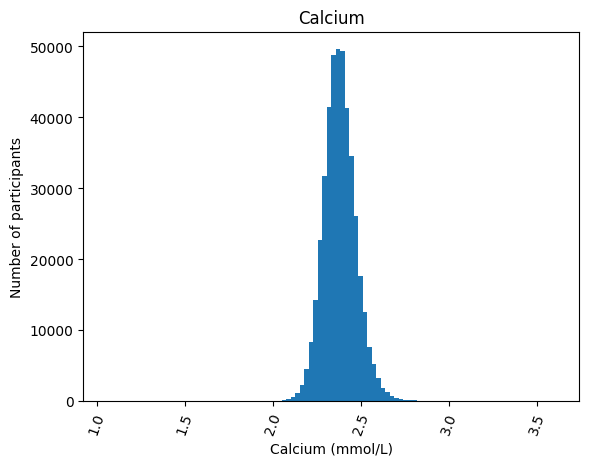

In [194]:
plt.hist(df['Calcium | Instance 0'].dropna().tolist(), bins=100)
plt.xlabel( 'Calcium (mmol/L)')
plt.ylabel("Number of participants")
plt.title('Calcium')
plt.xticks(rotation=70)
plt.show() 

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


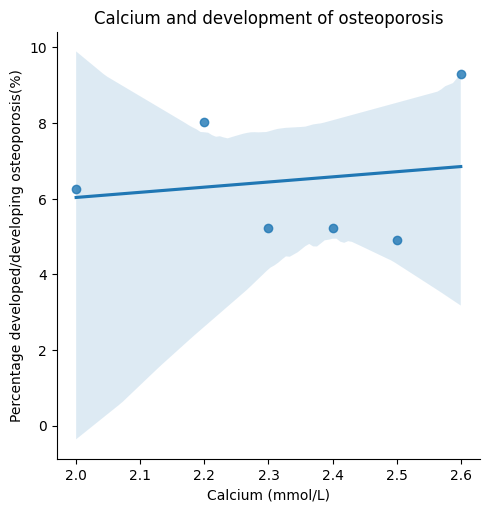

In [196]:
x = [x / 10.0 for x in range(20, 27, 1)]
xx=[]
y = []

for i in x:
    t = df[(df['Calcium | Instance 0']==i) & (df['all_osteo']==0) ]
    to = df[(df['Calcium | Instance 0']==i) & (df['all_osteo']==1)]
    if to.shape[0] == 0:
        
        if len(y) != 0:
            y.remove(k/(k+h)*100)
            y.append(k/(k+h+t.shape[0])*100)
            h=h+t.shape[0]  
    else:
        xx.append(i)
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)
        k = to.shape[0]
        h = t.shape[0]
        
tempdf = pd.DataFrame()
tempdf["x"] = xx
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel('Calcium (mmol/L)')
plt.ylabel("Percentage developed/developing osteoporosis(%)")
plt.title("Calcium and development of osteoporosis")
plt.show()

#### Vitamin D

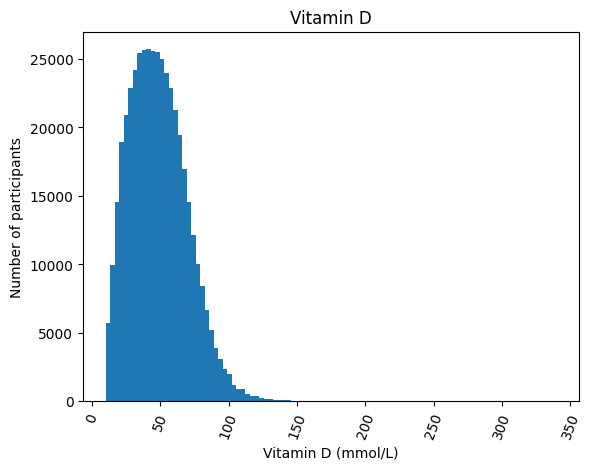

In [199]:
plt.hist(df['Vitamin D | Instance 0'].dropna().tolist(), bins=100)
plt.xlabel( 'Vitamin D (mmol/L)')
plt.ylabel("Number of participants")
plt.title('Vitamin D')
plt.xticks(rotation=70)
plt.show() 

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


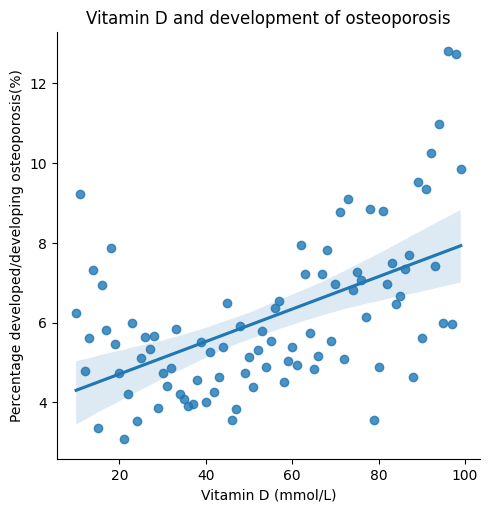

In [202]:
x = [x for x in range(1, 100)]
xx=[]
y = []

for i in x:
    t = df[(df['Vitamin D | Instance 0']==i) & (df['all_osteo']==0) ]
    to = df[(df['Vitamin D | Instance 0']==i) & (df['all_osteo']==1)]
    if to.shape[0] == 0:
        
        if len(y) != 0:
            y.remove(k/(k+h)*100)
            y.append(k/(k+h+t.shape[0])*100)
            h=h+t.shape[0]  
    else:
        xx.append(i)
        y.append(to.shape[0]/(t.shape[0]+to.shape[0])*100)
        k = to.shape[0]
        h = t.shape[0]
        
tempdf = pd.DataFrame()
tempdf["x"] = xx
tempdf["y"] = y

sns.lmplot(x = 'x', y = 'y', data=tempdf)

plt.xlabel('Vitamin D (mmol/L)')
plt.ylabel("Percentage developed/developing osteoporosis(%)")
plt.title("Vitamin D and development of osteoporosis")
plt.show()

### Binary metrics

In [161]:
from statsmodels.stats.contingency_tables import mcnemar 
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

In [187]:
b = ['Sex','osteopenia', "rheumatoid arthritis",
    "type 1 diabetes","hyperparathyroidism","malabsorption/coeliac disease", "liver/biliary/pancreas problem",
    "liver failure/cirrhosis", "alcoholic liver disease / alcoholic cirrhosis",
    'fracture lower leg / ankle',
'fracture metatarsal',
'fracture skull / head',
'fracture fibula',
'fracture tibia',
'fracture toe',
'fracture rib',
'fracture clavicle / collar bone',
'fracture forearm / wrist',
'fracture sternum',
'fracture upper arm / humerus / elbow',
'fracture foot',
'fracture wrist / colles fracture',
'fracture jaw',
'fracture finger',
'fracture patella / knee',
'fracture nose',
'fracture neck of femur / hip',
'fracture neck / cervical fracture',
'fracture pelvis',
'fracture radius',
'fracture ulna',
'fracture hand',
'fracture face / orbit / eye socket',
'fracture thumb',
'fracture shoulder / scapula',
'fracture shaft of femur',
'fracture vertebra / crush fracture / vertebral collapse',
'irritable bowel syndrome',
'bowel / intestinal perforation',
'inflammatory bowel disease',
'bowel / intestinal obstruction',
'bowel / intestinal infarction',
'anorexia/bulimia/other eating disorder',
'hiv/aids',
'crohns disease',
'hyperthyroidism/thyrotoxicosis',
'other renal/kidney problem',
'urinary tract infection/kidney infection',
'polycystic kidney',
'renal/kidney failure',
'kidney nephropathy',
'multiple sclerosis',
'spinal cord disorder',
'hiatus hernia',
'abdominal hernia',
'inguinal hernia',
'umbilical hernia',
'femoral hernia',
'incisional hernia',
'kidney stone/ureter stone/bladder stone',
'disc problem', 
'prolapsed disc/slipped disc',
'disc degeneration',
'dementia/alzheimers/cognitive impairment'
    ]

In [188]:
def binary_sign(i):
    no_nd = df[(df['all_osteo']==0) & (df[i] == 0)]
    po_nd = df[(df['all_osteo']==1) & (df[i] == 0)]
    
    no_pd = df[(df['all_osteo']==0) & (df[i] == 1)]
    po_pd = df[(df['all_osteo']==1) & (df[i] == 1)]

    data=[[ no_nd.shape[0],no_pd.shape[0] ],
          [po_nd.shape[0], po_pd.shape[0]] ]
    
    res1 = fisher_exact(data, alternative='two-sided')
    
    res2 = chi2_contingency(data)
    if res1.pvalue < 0.05 or res2.pvalue < 0.05:
        print(i)
        print(data)
        print(mcnemar(data, exact=False))
        print("fisher: ", res1.pvalue)
        print("chi2: ", res2.pvalue)
        print("\n")
    
    
    

In [189]:
for i in b:
    binary_sign(i)

Sex
[[249907, 224371], [23386, 4691]]
pvalue      0.0
statistic   163041.07757197577
fisher:  0.0
chi2:  0.0


osteopenia
[[473434, 844], [27683, 394]]
pvalue      0.0
statistic   25249.000736144706
fisher:  1.8962831547677526e-181
chi2:  0.0


rheumatoid arthritis
[[469666, 4612], [27031, 1046]]
pvalue      0.0
statistic   15882.398129128085
fisher:  4.175028504702902e-256
chi2:  0.0


type 1 diabetes
[[473879, 399], [28038, 39]]
pvalue      0.0
statistic   26861.449660653376
fisher:  0.004662851696677999
chi2:  0.0035282128374735625


hyperparathyroidism
[[474207, 71], [28060, 17]]
pvalue      0.0
statistic   27845.72692047919
fisher:  6.773771084997751e-06
chi2:  7.65500897182259e-08


malabsorption/coeliac disease
[[472762, 1516], [27545, 532]]
pvalue      0.0
statistic   23311.544131310002
fisher:  1.3880927629651587e-198
chi2:  0.0


liver/biliary/pancreas problem
[[473501, 777], [27990, 87]]
pvalue      0.0
statistic   25741.055514999825
fisher:  1.658513635964938e-07
chi2:  1.4

We take all significant binary and continious variables that show a trend, based on this we subset a group from which we calculate the prevalence of osteoporosis which translates to the risk percentage for the individual

note that calcium and vitamin D uptake can not be determined by single measurement

In [21]:
df.columns.tolist()

['Participant ID',
 'Date M80 first reported (osteoporosis with pathological fracture)',
 'Date M81 first reported (osteoporosis without pathological fracture)',
 'Date M82 first reported (osteoporosis in diseases classified elsewhere)',
 'Date M80 first reported (osteoporosis with pathological fracture)_binary',
 'Date M81 first reported (osteoporosis without pathological fracture)_binary',
 'Date M82 first reported (osteoporosis in diseases classified elsewhere)_binary',
 'Haemoglobin concentration | Instance 0',
 'Haemoglobin concentration | Instance 1',
 'Haemoglobin concentration | Instance 2',
 'Albumin | Instance 0',
 'Albumin | Instance 1',
 'Creatinine | Instance 0',
 'Creatinine | Instance 1',
 'C-reactive protein | Instance 0',
 'C-reactive protein | Instance 1',
 'Cholesterol | Instance 0',
 'Cholesterol | Instance 1',
 'HDL cholesterol | Instance 0',
 'HDL cholesterol | Instance 1',
 'LDL direct | Instance 0',
 'LDL direct | Instance 1',
 'Glucose | Instance 0',
 'Glucose 

In [198]:
for i in df.columns.tolist():
    if re.search("Vit", str(i)):
            print(i)

Vitamin D | Instance 0
Vitamin D | Instance 1


In [140]:
df["type 1 diabetes"].unique()

array([0, 1], dtype=int64)